function (...) 
.Internal(options(...))
<bytecode: 0x55ff154ec990>
<environment: namespace:base>

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


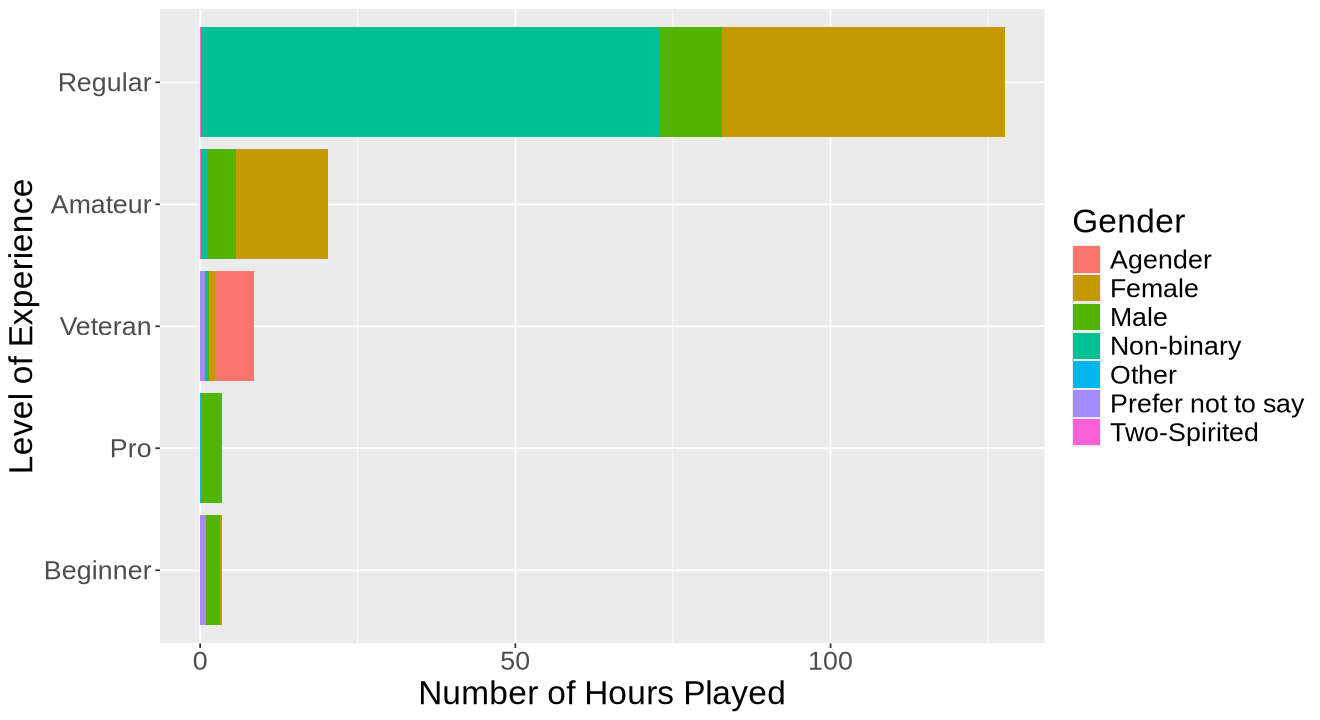

In [234]:
library(tidyverse)
library(readr)
options
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
download.file(url, destfile = "players.csv")
players <- read_csv("players.csv")
players1 <- players %>% select(-hashedEmail, -name)|>
            select(experience, age, played_hours,gender)

players2 <- players1|>
          group_by(experience, gender)|>
          summarize(mean_age = mean(age, na.rm = TRUE),
          mean_played_hours = mean(played_hours, na.rm = TRUE))|>
          arrange(-mean_played_hours)
          #filter(gender != "Agender", gender != "Other")
 

options(repr.plot.width=11, repr.plot.height=6)
players2_plot <- players2|>
            ggplot(aes(x = mean_played_hours, y = reorder(experience, mean_played_hours) , fill = gender))+
            geom_bar(stat="identity")+
            labs(x = "Number of Hours Played", y = "Level of Experience", fill = "Gender")+
            theme(text = element_text(size=20))
           
players2_plot

In [244]:
gender_counts <- players %>%
               count(gender)
sel <- players1|>
            select(gender, played_hours)|>
            arrange(gender)
                
players5 <- players1|>              
            group_by(gender)|>
            summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))|>
            arrange(-avg_played_hours)
sel
gender_counts             
players5
players2

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6
